In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
type(sns.load_dataset('iris'))

pandas.core.frame.DataFrame

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df1 = df.drop('species', axis=1)

In [9]:
target = df['species']
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
df1.shape

(150, 4)

In [13]:
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

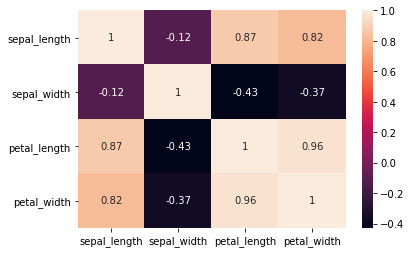

In [27]:
sns.heatmap(df1.corr(),annot=True)

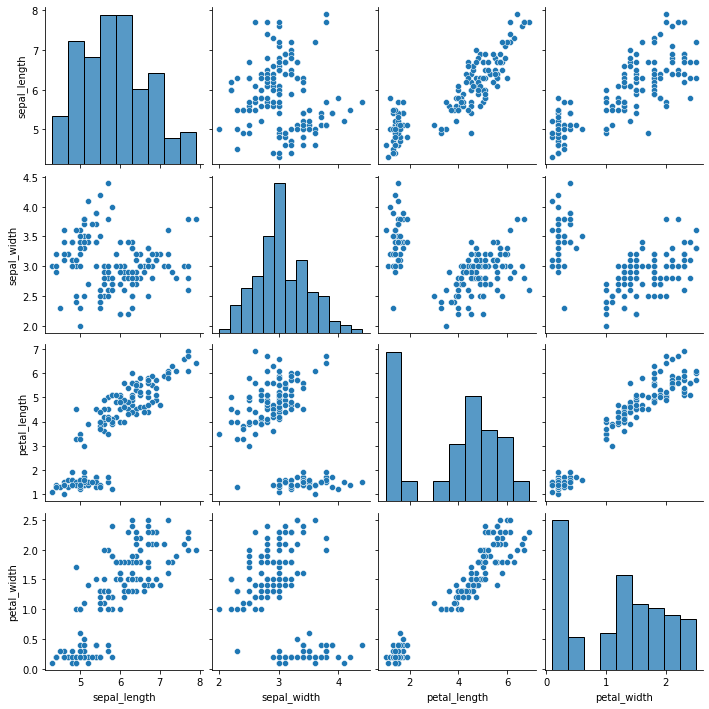

In [28]:
sns.pairplot(df1)

In [19]:
from scipy.cluster import hierarchy
z = hierarchy.linkage(df1, 'single')

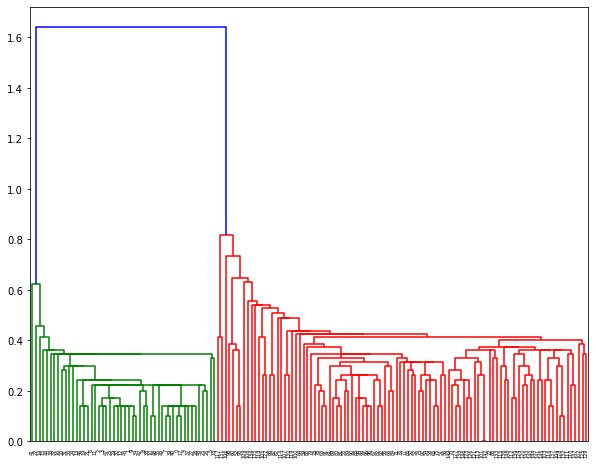

In [23]:
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(z)
plt.show()

Using 2 clusters (as shown in dendrogram)

In [24]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering()

In [25]:
agc.fit(df1)

AgglomerativeClustering()

In [26]:
agc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
Using 3 clusters

In [34]:
agc1 = AgglomerativeClustering(n_clusters=3, distance_threshold=None)

In [35]:
agc1.fit(df1)

AgglomerativeClustering(n_clusters=3)

In [36]:
agc1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

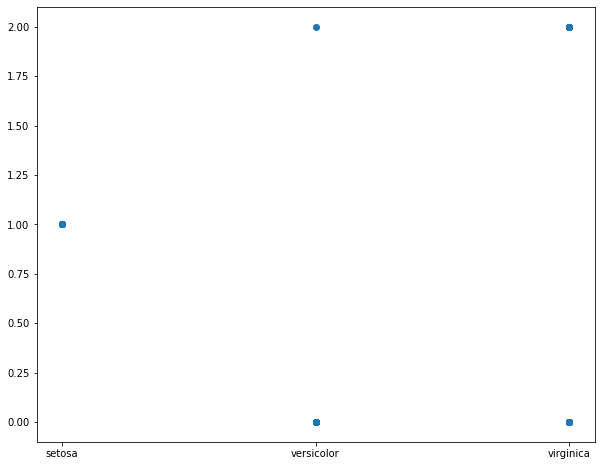

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(target,agc1.labels_)
plt.show()

In [ ]:
# some of the points were misclassified as versicolor or virginica

In [40]:
target.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [46]:
for i in range(3):
    print(i,sum(agc1.labels_==i))

0 64
1 50
2 36


In [54]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

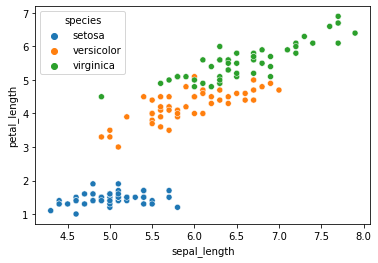

In [55]:
sns.scatterplot(x=df['sepal_length'],y=df['petal_length'], hue='species', data = df)

In [56]:
df1['Labels'] = agc1.labels_

In [57]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


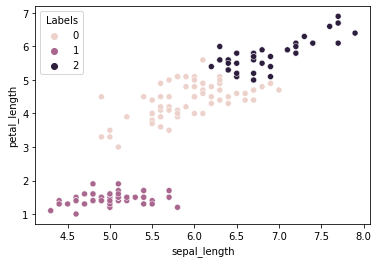

In [58]:
sns.scatterplot(x=df1['sepal_length'],y=df1['petal_length'], hue='Labels', data = df1)

In [ ]:
# 0 - versicolor
# 1 - setosa
# 2 - virginica

In [60]:
type(df1['Labels'])

pandas.core.series.Series

In [65]:
df1['Species'] = df1['Labels'].replace([0,1,2],['versicolor','setosa','virginica'])

In [66]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Labels,Species
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy",accuracy_score(df1['Species'],df['species']))

Accuracy 0.8933333333333333


In [69]:
print("Confusion matrix")
print(confusion_matrix(df1['Species'],df['species']))

Confusion matrix
[[50  0  0]
 [ 0 49 15]
 [ 0  1 35]]
